# Практическая работа №1
## Предварительная обработка данных
Выполнил: Терентьев Никита Александрович КИ21-16/1б
Вариант: 21
## Цель работы
Знакомство с основными задачами предварительной обработки исходных данных, изучение основных методов предварительной обработки данных, формирование навыков выполнения предварительной обработки исходных данных с помощью языка программирования Python.
## Задачи
Выполнение практической работы предполагает решение следующих задач:
1. Визуальный анализ исходных данных
2. Поиск аномальных значений
3. Поиск и восстановление отсутствующих значений
4. Преобразование данных
## Ход работы
Был произведён импорт необходимых библиотек.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from scipy.stats import sigmaclip

from functions import build_bar_and_pie_chart, build_histogram_density_diagram

Произведено чтение файла и взятие нужных колонок из таблицы в соответствии с вариантом.

In [28]:
data = pd.read_excel(r"C:\Users\nikit\Desktop\Программирование\4 семестр\data_analysis_methods\1 lab\data\first_practice_dataframe.xlsx")
# Названия колонок датафрейма храним в константах
GENDER = "cat1_gender"
EDUCATION = "cat3_education"
NUM1 = "num1_22"
NUM2 = "num2_22"
NUM3 = "num3_22"
headers = [GENDER, EDUCATION, NUM1, NUM2, NUM3]
dataframe = pd.DataFrame(data[headers])
dataframe

,cat1_gender,cat3_education,num1_22,num2_22,num3_22
0,male,high school,311.628509,664.606363,648.5319
1,male,phd,88.551646,1001.232482,665.864398
2,male,School SAT,314.105165,806.071418,667.958668
3,NaN,BSc,-168.550590,987.065373,651.231183
4,male,phd,294.298042,1216.844021,645.612568
...,...,...,...,...,...
995,male,phd,-34.721255,NaN,619.945966
996,male,phd,-55.516395,858.140616,637.922461
997,male,phd,-43.164240,717.465601,675.80899
998,NaN,phd,-220.999640,1001.632875,NaN


### 1. Визуальный анализ данных
Были построены графики для визуального представления каждого столбца(признака) в исходном наборе данных.
Все функции для построения графиков были вынесены в отдельный файл functions.py

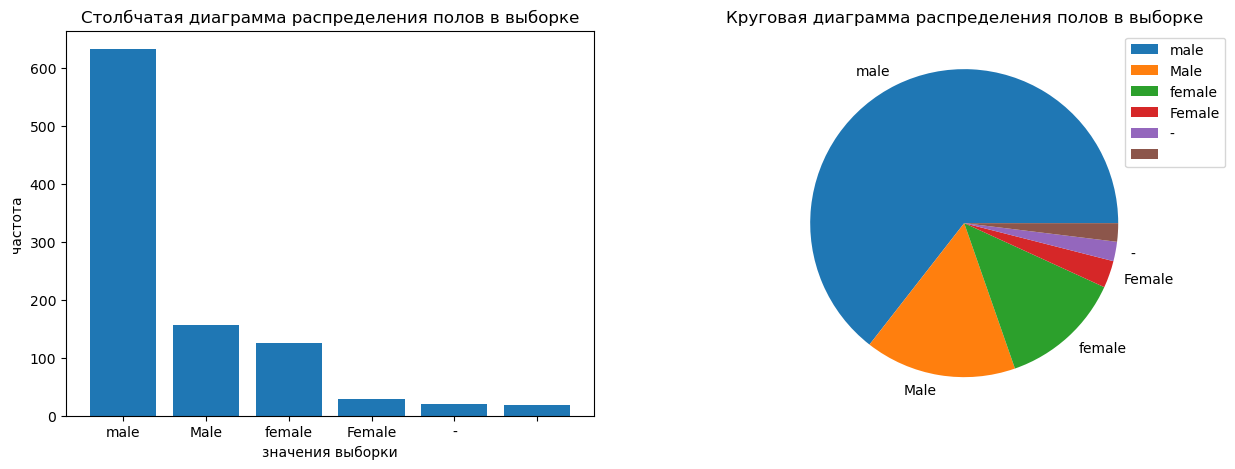

In [29]:
build_bar_and_pie_chart(dataframe, GENDER, "полов")

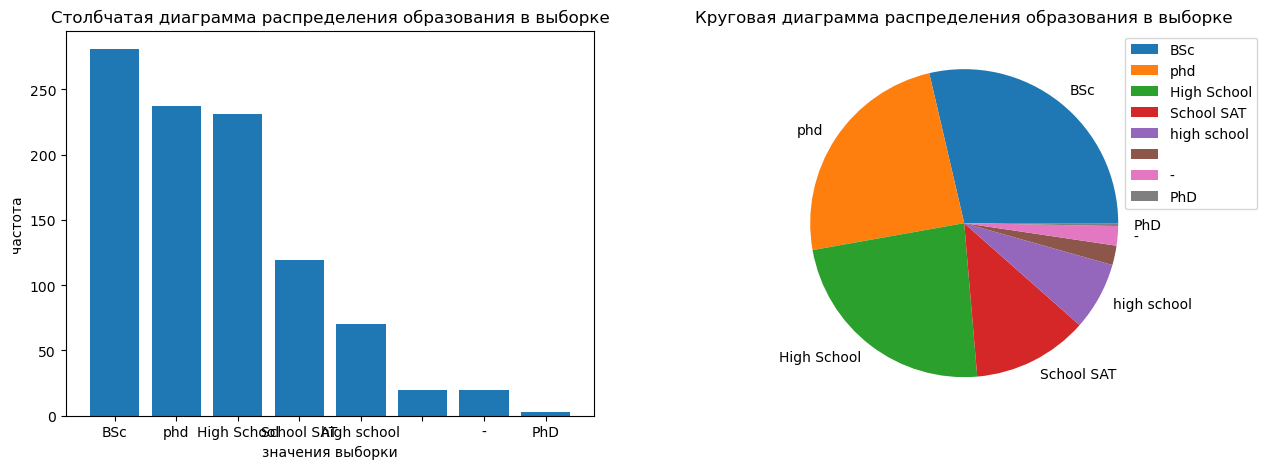

In [30]:
build_bar_and_pie_chart(dataframe, EDUCATION, "образования")

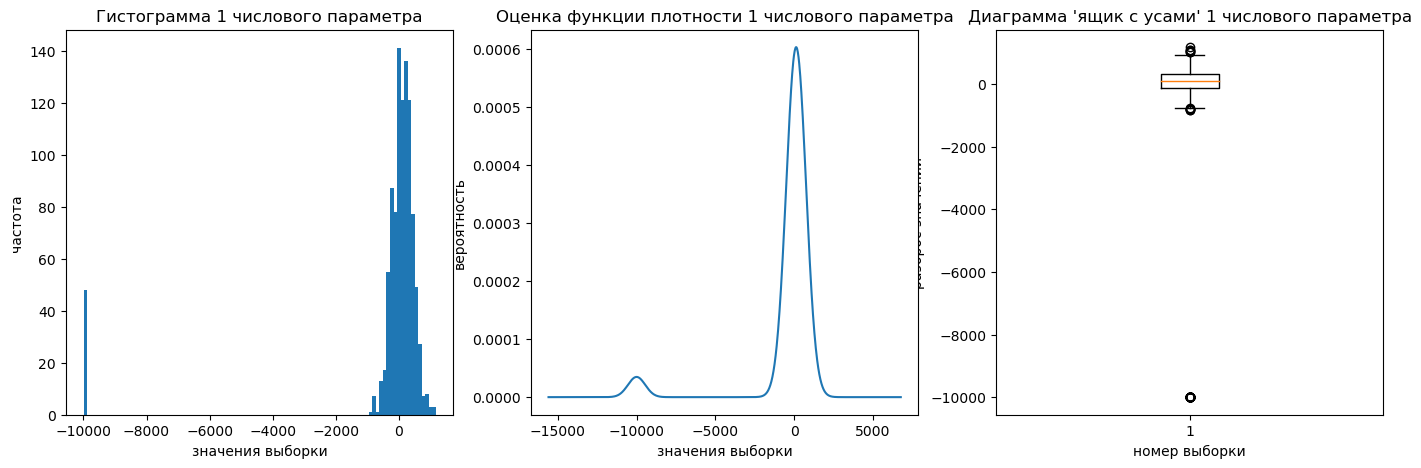

In [31]:
build_histogram_density_diagram(dataframe, NUM1, 1)

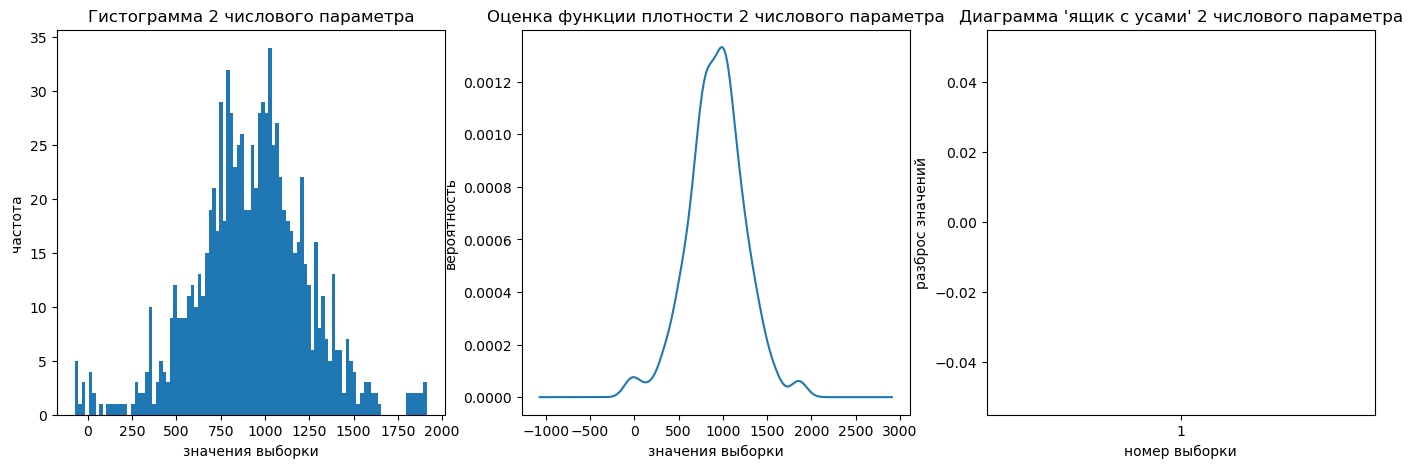

In [32]:
build_histogram_density_diagram(dataframe, NUM2, 2)

График не может быть построен, так как он содержит не только числовые значения.


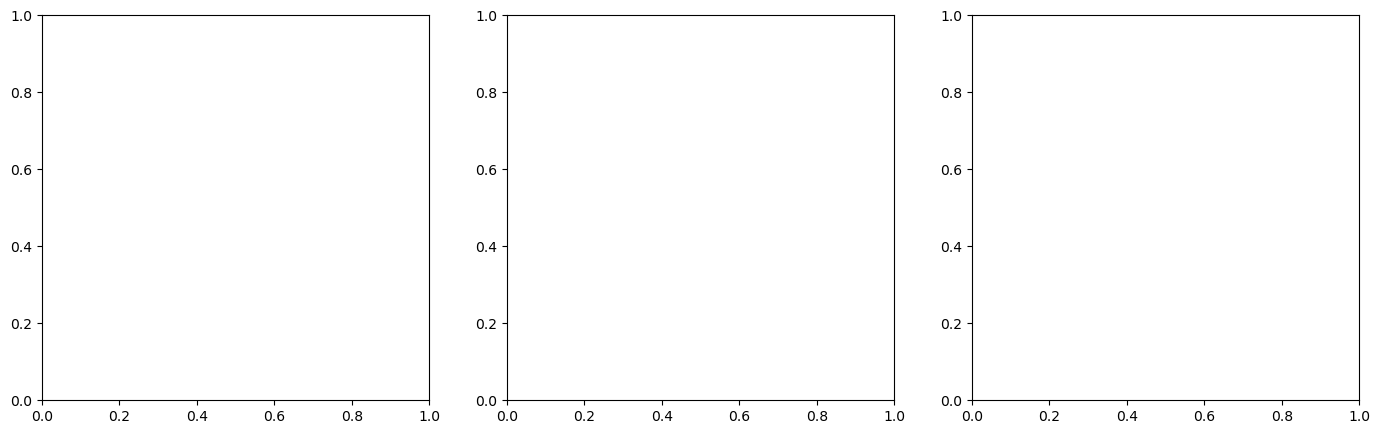

In [33]:
try:
    build_histogram_density_diagram(dataframe, NUM3, 3)
except TypeError:
    print("График не может быть построен, так как он содержит не только числовые значения.")

### 2. Проверка правдоподобности исходных данных
Проанализировав полученные графики, можно сделать вывод, что некоторые значения из таблицы являются некорректными (например, пропуски значений). Метод info позволяет увидеть, что некоторые колонки имеют неверный тип.

In [34]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cat1_gender     982 non-null    object 
 1   cat3_education  981 non-null    object 
 2   num1_22         1000 non-null   float64
 3   num2_22         951 non-null    float64
 4   num3_22         974 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


#### Изменение качественных признаков

Выводим уникальные значения, содержащиеся в каждом столбце, чтобы понимать то, каким образом будет производиться чистка данных.

In [35]:
dataframe.cat1_gender.unique()

array(['male', nan, 'female', 'Male', '-', 'Female', ' '], dtype=object)

In [36]:
dataframe.cat3_education.unique()

array(['high school', 'phd', 'School SAT', 'BSc', 'High School', ' ', nan,
       '-', 'PhD'], dtype=object)

Приведём найденные значения к нужному формату (всем пустым значениям был присвоен тип None, признаки, отличающиеся типом написания, были приведены к одному виду).

In [38]:
dataframe[GENDER].replace(to_replace=[" ", "-", "", np.nan], value=None, inplace=True)
dataframe[GENDER].replace(to_replace="male", value="Male", inplace=True)
dataframe[GENDER].replace(to_replace="female", value="Female", inplace=True)

In [39]:
dataframe[EDUCATION].replace(to_replace=[" ", "-", "", np.nan], value=None, inplace=True)
dataframe[EDUCATION].replace(to_replace="high school", value="High School", inplace=True)
dataframe[EDUCATION].replace(to_replace="phd", value="PhD", inplace=True)

Первая и вторая колонка были приведены к категориальному типу.

In [40]:
dataframe[GENDER] = dataframe[GENDER].astype("category")
dataframe[EDUCATION] = dataframe[EDUCATION].astype("category")

#### Изменение количественных признаков

In [41]:
dataframe.num3_22.apply(lambda x: x if not isinstance(x, float) else None).unique()

array([None, ' ', '-'], dtype=object)

In [42]:
dataframe[NUM3].replace(to_replace=[" ", "-", "", None], value=np.nan, inplace=True)

Был построен ряд графиков исходя из обновленных значений последнего столбца.

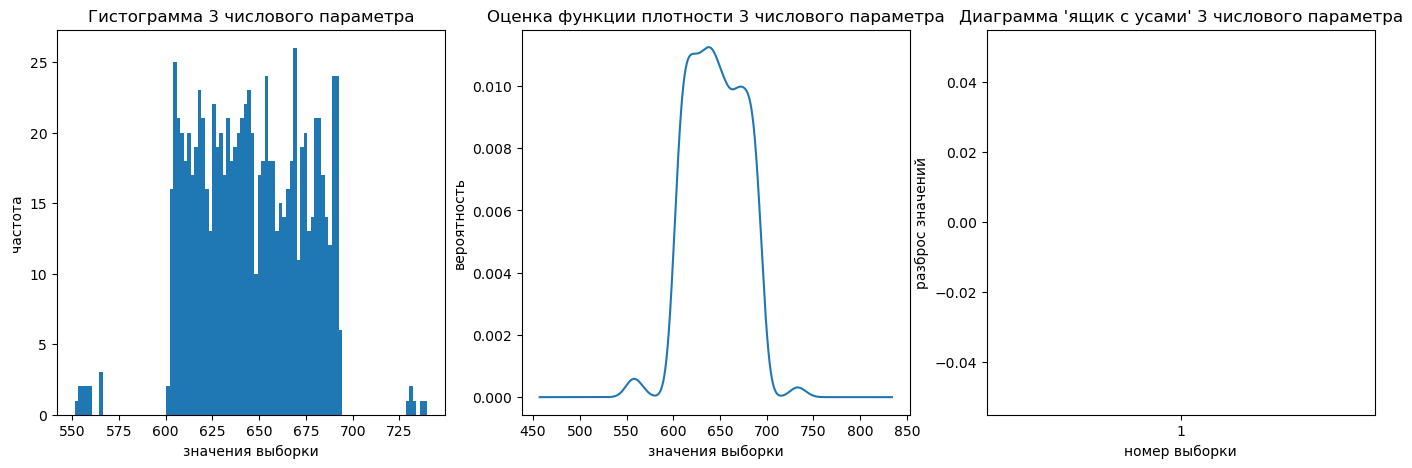

In [43]:
build_histogram_density_diagram(dataframe, NUM3, 3)

Все данные были приведены к нужному формату. Все качественные признаки имеют тип category, все количественные - float64.

In [44]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   cat1_gender     943 non-null    category
 1   cat3_education  941 non-null    category
 2   num1_22         1000 non-null   float64 
 3   num2_22         951 non-null    float64 
 4   num3_22         914 non-null    float64 
dtypes: category(2), float64(3)
memory usage: 25.8 KB


### 3. Поиск аномальных значений